<a href="https://colab.research.google.com/github/kaiqued/MachineLearning/blob/main/04_06_Le_C%C3%B4d%C3%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <span style="color:pink">**PROJETO FINAL DE MACHINE LEARNING 2022.1**</span>
### **COLORIZAÇÃO DE IMAGENS BASEADA EM CAPAS DE ÁLBUNS**
NICOLE SARVASI ALVES DA COSTA & KAÍQUE DOGNANI

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importação de bibliotecas:

In [ ]:
from tensorflow import keras
from tensorflow.keras.utils import img_to_array, load_img
from skimage.color import rgb2hsv
import numpy as np
import os
from skimage.color import hsv2rgb
import PIL
import pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Importando a base de dados:

Passando as imagens para HSV e dividindo-as por canal de cor, o X_hsv para o canal de valor (V) e o Y_hsv para os canais de matriz (H) e saturação (S).

In [ ]:
# def RGB2X_Y():
#     with open('drive/MyDrive/Colab Notebooks/dados.pkl', 'rb') as file:
#         newDataSet = pickle.load(file)
#         file.close()
#     newDataSet = newDataSet/255.0
#     for index, img in enumerate(newDataSet):
#         newDataSet[index] = rgb2hsv(img)
#     X_hsv = np.expand_dims(newDataSet[:,:,:,2], 3)
#     Y_hsv = newDataSet[:,:,:,:2]
#     return (X_hsv, Y_hsv)
# X_hsv, Y_hsv = RGB2X_Y()

In [ ]:
# with open('drive/MyDrive/Colab Notebooks/dados_XY.pkl', 'wb') as file:
#     pickle.dump((X_hsv, Y_hsv), file)

In [ ]:
with open('drive/MyDrive/Colab Notebooks/dados_XY.pkl', 'rb') as file:
    X_hsv, Y_hsv = pickle.load(file)

In [ ]:
print(X_hsv.shape)
print(Y_hsv.shape)

(11957, 150, 150, 1)
(11957, 150, 150, 2)


In [ ]:
X_hsv.mean()

0.55469435

Separando o conjunto de treino e teste:

In [ ]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)


X_train, X_test, Y_train, Y_test = train_test_split(
    X_hsv, Y_hsv,
    test_size=0.1,
    random_state=RANDOM_SEED,
)

In [ ]:
Y_train.shape

(10761, 150, 150, 2)

In [ ]:
X_train.shape

(10761, 150, 150, 1)

Criando um modelo básico:

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, input_shape=[150,150,1], kernel_size=3, padding="same", activation="relu"),
    #keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128, input_shape=[150,150,1], kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(128, input_shape=[150,150,1], kernel_size=3, padding="same", activation="relu"),
    #keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(256, input_shape=[150,150,1], kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(2, kernel_size=3, padding="same", activation="sigmoid"), 
])


In [ ]:
model.compile(loss="mse", optimizer="nadam")

In [ ]:
history = model.fit(X_train, Y_train, epochs=30, batch_size=16)

#score = model.evaluate(X_test, Y_test)

Epoch 1/30
673/673 [==============================] - 157s 206ms/step - loss: 0.0942
Epoch 2/30
673/673 [==============================] - 138s 205ms/step - loss: 0.0918
Epoch 3/30
673/673 [==============================] - 137s 204ms/step - loss: 0.0908
Epoch 4/30
673/673 [==============================] - 137s 204ms/step - loss: 0.0899
Epoch 5/30
673/673 [==============================] - 137s 203ms/step - loss: 0.0886
Epoch 6/30
673/673 [==============================] - 137s 204ms/step - loss: 0.0877
Epoch 7/30
673/673 [==============================] - 137s 204ms/step - loss: 0.0871
Epoch 8/30
673/673 [==============================] - 137s 204ms/step - loss: 0.0865
Epoch 9/30
673/673 [==============================] - 137s 203ms/step - loss: 0.0860
Epoch 10/30
673/673 [==============================] - 137s 204ms/step - loss: 0.0855
Epoch 11/30
673/673 [==============================] - 137s 204ms/step - loss: 0.0851
Epoch 12/30
673/673 [==============================] - 137s 204

In [ ]:
import PIL
path_img = "drive/MyDrive/Colab Notebooks/tt.jpg"
file = PIL.Image.open(path_img)
if file.size != (150,150):
    file = file.resize((150,150))
    file.save(path_img)

In [ ]:
img = img_to_array(load_img(path_img))
print(img.shape)

(150, 150, 3)


In [79]:
img_hsv   = rgb2hsv(img/255.0)
img_X_test = np.expand_dims(img_hsv[:,:,2],2)
print(img_X_test.shape)
img_Y_test = img_hsv[:,:,:2]

(150, 150, 1)


In [81]:
img_Y_pred = model.predict(np.array([img_X_test]))
img_Y_pred.shape

(1, 150, 150, 2)

In [90]:
img_pred_hsv = np.concatenate((img_Y_pred[0,:,:,:],img_X_test), axis=2)
img_test_hsv = np.concatenate((img_Y_test,img_X_test), axis=2)

In [86]:
print("img_pred_hsv",img_pred_hsv.shape)
print("img_teste_hsv",img_test_hsv.shape)

img_pred_hsv (150, 150, 3)
img_teste_hsv (150, 150, 3)


In [87]:
Imagem_Pred = (255*hsv2rgb(img_pred_hsv)).astype(np.uint8)
Imagem_Test = (255*hsv2rgb(img_test_hsv)).astype(np.uint8)
print("Imagem_Pred",Imagem_Pred.shape)
print("Imagem_Test",Imagem_Test.shape)

Imagem_Pred (150, 150, 3)
Imagem_Test (150, 150, 3)


Text(0.5, 1.0, 'Pred')

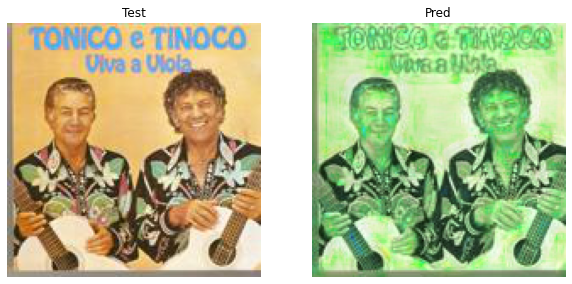

In [88]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,2,1)
plt.imshow(Imagem_Test)
plt.axis('off')
plt.title("Test")

fig.add_subplot(1,2,2)
plt.imshow(Imagem_Pred)
plt.axis('off')
plt.title("Pred")